In [1]:
import sys
import os
# Dynamically get the path of the current directory
current_dir = os.getcwd()

# Assuming the package is one level up
local_package_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add this path to sys.path
sys.path.insert(0, local_package_dir)

# Now you can import your local package
from util import validate



In [2]:
#from truthnet.util import validate
import pandas as pd

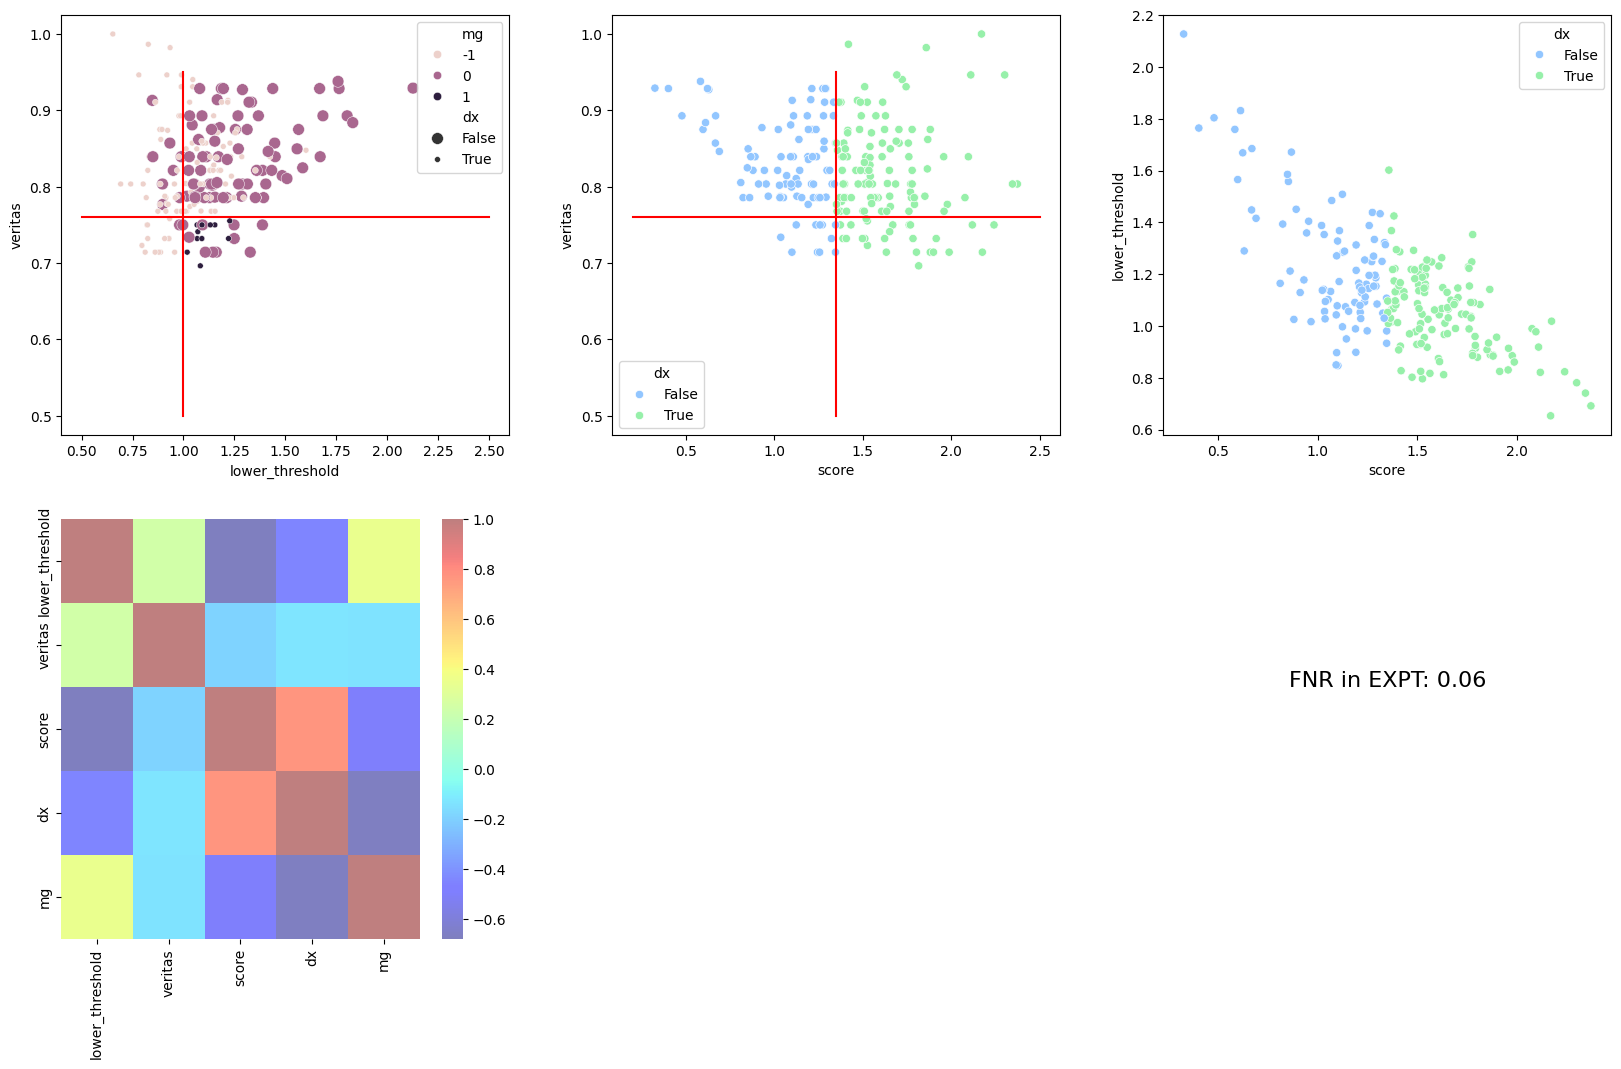

In [12]:
resf=pd.read_csv('../../data/res_exp_model2.csv',index_col=0).T
resf.columns=['lower_threshold','veritas','score']
d1,wf1=validate(resf,C0=1,C1=0.76,C2=1.35,DX=False,score=True,
         outfile='exptvalid.png',
         validation_type='fnrexpt')

            tpr       ppv       acc       npv       LR+       LR-  threshold
fpr                                                                         
0.083  0.546512  0.879305  0.731971  0.677113  8.915798  0.487412   1.278034
0.084  0.549248  0.878840  0.732845  0.678231  8.842099  0.484955   1.274424
0.085  0.551984  0.878376  0.733718  0.679349  8.768401  0.482498   1.270813
0.086  0.554720  0.877911  0.734591  0.680468  8.694703  0.480042   1.267203
0.087  0.557456  0.877446  0.735465  0.681586  8.621004  0.477585   1.263592
0.088  0.560192  0.876981  0.736338  0.682704  8.547306  0.475129   1.259981
0.089  0.562927  0.876516  0.737211  0.683823  8.473607  0.472672   1.256371
0.090  0.565663  0.876051  0.738084  0.684941  8.399909  0.470216   1.252760
0.091  0.568399  0.875586  0.738958  0.686059  8.326210  0.467759   1.249149
0.092  0.571135  0.875121  0.739831  0.687178  8.252512  0.465302   1.245539


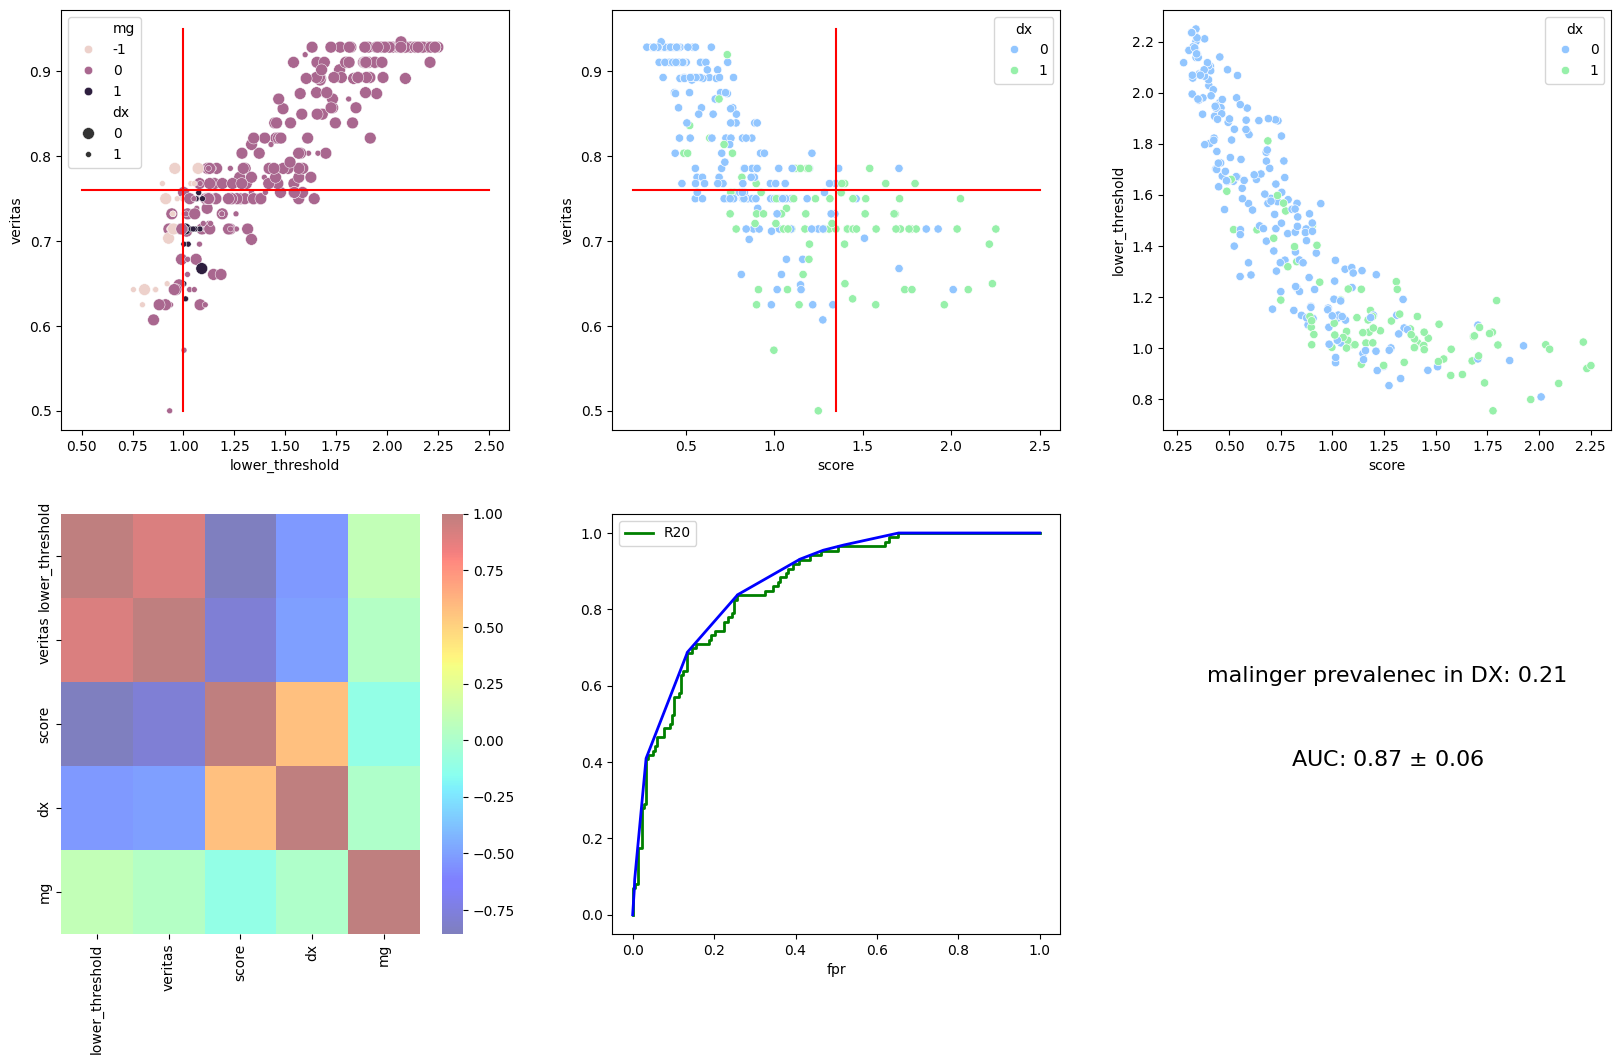

In [13]:
resf=pd.read_csv('../../data/res_R20_model2.csv',index_col=0).T
resf.columns=['lower_threshold','veritas','score']
resf['dx'] = [int(x[-1]) for x in resf.index.values]
d2,wf2=validate(resf,C0=1,C1=0.76,C2=1.35,DX=True,score=True,
         outfile='ptsdvalid.png',
         validation_type='withdx')

In [5]:
from truthnet import load_veritas_model

In [6]:
M=load_veritas_model('../../veritas_models/veritas_002.pkl.gz')

In [7]:
M

{'version': '0.0.1',
 'model': qnet.Qnet,
 'model_neg': qnet.Qnet,
 'problem': '',
 'calibration_lower': array([1.20398725, 1.20398725, 1.20398725, ..., 1.29696621, 1.29880653,
        1.29880653]),
 'calibration_veritas': array([0.65791448, 0.65791448, 0.65791448, ..., 0.69963702, 0.68822158,
        0.68822158]),
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1c536b9f40>,
 'LOWER_THRESHOLD': 1.1457407246215392,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1c5363f160>,
 'VERITAS_THRESHOLD': 0.6971038897415065,
 'upper_scoretoprobability': <bound method processRoc.scoretoprobability of <zedstat.zedstat.processRoc object at 0x7f1c536bde20>>,
 'UPPER_THRESHOLD': 1.2683587177075477,
 'AUC': (0.844551724137931, 0.8521131405190563, 0.8369903077568057)}

In [8]:
lf=M['calibration_lower']
xmin,xmax=1,1.4
ld=M['dist_lower']

In [9]:
vf=M['calibration_veritas']
vd=M['dist_veritas']
xmind,xmaxd=vf.min(),vf.max()

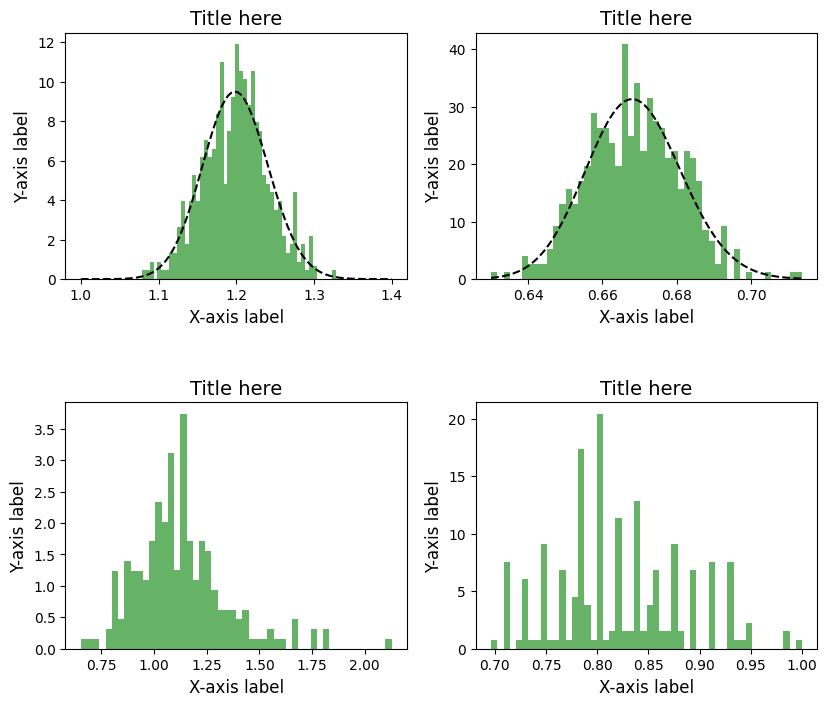

In [21]:
import numpy as np
import pylab as plt
plt.style.use('seaborn-v0_8-pastel')

plt.figure(figsize=[15,8])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# First subplot
plt.subplot(231)
x = np.linspace(xmin, xmax, 100)
plt.plot(x, ld.pdf(x), '--k')
plt.hist(lf, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('X-axis label', fontsize=12)  # Set font size for x-label
plt.ylabel('Y-axis label', fontsize=12)  # Set font size for y-label
plt.title('Title here', fontsize=14)    # Set font size for title

# Adjust font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Second subplot
plt.subplot(232)
xd = np.linspace(xmind, xmaxd, 100)
plt.plot(xd, vd.pdf(xd), '--k')
plt.hist(vf, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('X-axis label', fontsize=12)
plt.ylabel('Y-axis label', fontsize=12)
plt.title('Title here', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10);


# First subplot
plt.subplot(234)
#x = np.linspace(xmin, xmax, 100)
#plt.plot(x, ld.pdf(x), '--k')
plt.hist(wf1.lower_threshold, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('X-axis label', fontsize=12)  # Set font size for x-label
plt.ylabel('Y-axis label', fontsize=12)  # Set font size for y-label
plt.title('Title here', fontsize=14)    # Set font size for title

# Adjust font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);


# First subplot
plt.subplot(235)
#x = np.linspace(xmin, xmax, 100)
#plt.plot(x, ld.pdf(x), '--k')
plt.hist(wf1.veritas, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('X-axis label', fontsize=12)  # Set font size for x-label
plt.ylabel('Y-axis label', fontsize=12)  # Set font size for y-label
plt.title('Title here', fontsize=14)    # Set font size for title

# Adjust font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);


In [15]:
wf2

,lower_threshold,veritas,score,dx,mg
CAT10050,1.766693,0.901883,0.680022,0,0
CAT10010,0.928472,0.714286,1.248364,0,0
CAT10020,1.117376,0.785714,1.025116,0,0
CAT10030,1.308874,0.767857,1.061628,0,0
CAT10040,1.775565,0.892857,0.684865,0,0
...,...,...,...,...,...
CAT12990,1.286232,0.767857,0.606269,0,0
CAT13011,1.133075,0.720779,1.325811,1,0
CAT13020,1.523528,0.793067,0.720745,0,0
CAT13040,1.895962,0.910714,0.444272,0,0


In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']